In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
sj=pd.read_csv('SJ_for_model.csv')
iq=pd.read_csv('IQ_for_model.csv')


In [ ]:
sj.head()

,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,lon(toal_cases),air_temp/dew_temp,Percentage_temp_change,2nd_previous_week_precip,month,wet_season,total_vegetation
0,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4,1.609438,1.018223,0.235102,12.42,4,1,0.150606
1,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5,1.791759,1.015279,0.235102,12.42,5,1,0.157479
2,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4,1.609438,1.011658,0.145996,12.42,5,1,0.133315
3,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3,1.386294,1.013269,0.117104,22.82,5,1,0.209286
4,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6,1.945910,1.012990,0.145613,34.54,5,1,0.239235


In [ ]:
sj['week_start_date']=pd.to_datetime(sj['week_start_date'])
iq['week_start_date']=pd.to_datetime(iq['week_start_date'])
sj['month'] = sj['week_start_date'].dt.month
iq['month'] = iq['week_start_date'].dt.month

In [ ]:
def scaler(x):
  return (x - x.min())/(x.max() - x.min())

**SAN** **JUAN**

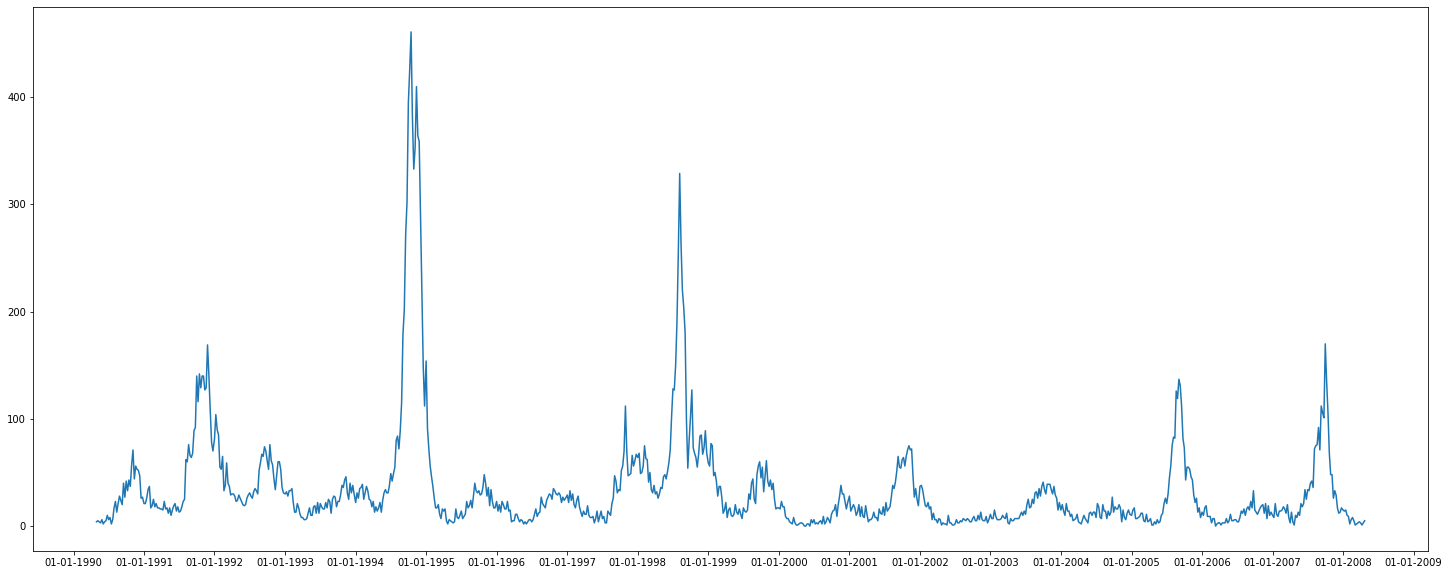

In [ ]:
plt.figure(figsize=(25,10))
plt.plot(sj['week_start_date'],sj["total_cases"])
# plt.plot(sj['week_start_date'],scaler(sj["station_min_temp_c"]))
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator(1, month=1, day=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))

In [ ]:
#Grouping year wise
#Assuming 'Noisy year' as years with weekly mean greater than 80 cases
sj.groupby(["year"]).agg({"total_cases":["sum","max","min","mean","std",lambda x:"Noisy Year" if x.mean()>80 else "Normal Year"]})

total_cases                                              
             sum  max min        mean         std   <lambda_0>
year                                                          
1990         866   71   2   24.742857   19.581418  Normal Year
1991        2801  169  10   53.865385   47.929699  Normal Year
1992        2371  104  19   45.596154   20.611495  Normal Year
1993        1156   46   6   22.230769   10.222266  Normal Year
1994        6533  461  13  125.634615  140.954593   Noisy Year
1995        1333  154   2   25.634615   25.213620  Normal Year
1996         855   35   2   16.442308    9.710341  Normal Year
1997        1454  112   3   27.961538   23.092280  Normal Year
1998        4595  329  26   88.365385   66.697452   Noisy Year
1999        1633   77   7   31.403846   18.431920  Normal Year
2000         492   38   0    9.461538    9.348297  Normal Year
2001        1463   75   4   28.134615   21.856958  Normal Year
2002         452   38   1    8.692308    8.826294  Normal Year
2003         949   41   2   18.250000   12.051971  Normal Year
2004         610   27   2   11.730769    5.481217  Normal Year
2005        1805  137   1   34.711538   38.011008  Normal Year
2006         550   33   0   10.576923    6.797768  Normal Year
2007        1969  170   1   37.865385   38.023743  Normal Year
2008         106   15   1    6.235294    4.802726  Normal Year

-> Year 1994 and 1998 records an unusual number of total cases than rest of the years


---




-> Std is 140 in year 1994 and 66 in year 1998 tells the peak number of cases happend in only certain months


In [ ]:
# a=1
# for i in range(len(sj)):
#   if (sj["year"]=='1994'):
#        peak_year=sj

#   else:
#     a+1
  




In [ ]:
year_1993=sj.loc[sj["year"]==1993]
peak_year_1994=sj.loc[sj["year"]==1994]
year_1995=sj.loc[sj["year"]==1995]
year_1997=sj.loc[sj["year"]==1997]
peak_year_1998=sj.loc[sj["year"]==1998]
year_1999=sj.loc[sj["year"]==1999]

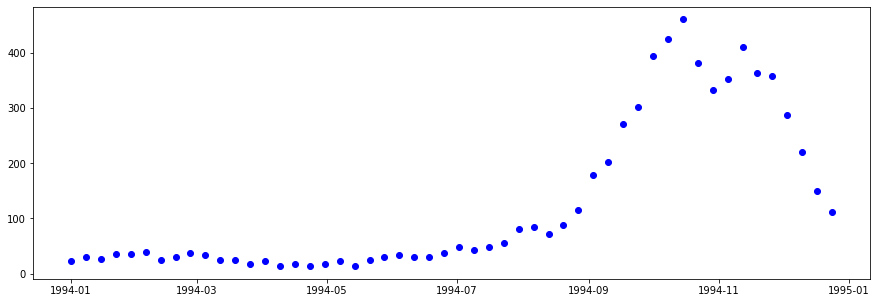

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(peak_year_1994['week_start_date'],peak_year_1994["total_cases"], 'bo')

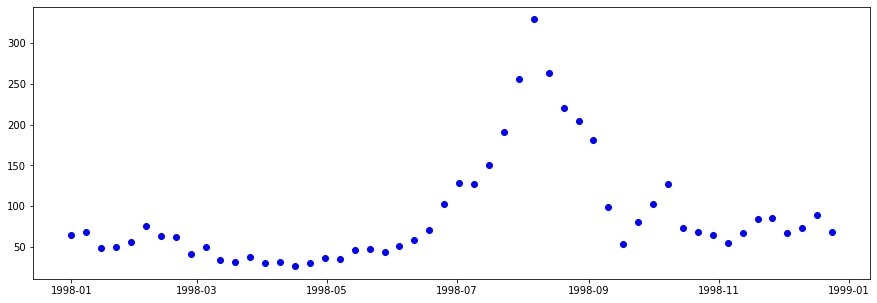

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(peak_year_1998['week_start_date'],peak_year_1998["total_cases"], 'bo')

In [ ]:
peak_year_1994.groupby(["month"]).agg({"total_cases":["sum","max","min","mean"]})

total_cases                  
              sum  max  min    mean
month                              
1             150   36   22   30.00
2             132   39   25   33.00
3             100   33   18   25.00
4              85   23   13   17.00
5              90   31   13   22.50
6             134   38   31   33.50
7             275   80   42   55.00
8             360  115   72   90.00
9             955  302  179  238.75
10           1996  461  333  399.20
11           1486  410  353  371.50
12            770  288  112  192.50

In 1994, cases are starting to rise from month June, peaks at October and declies

In [ ]:
year_1995.groupby(["month"]).agg({"total_cases":["sum","max","min","mean"]})

total_cases                
              sum  max min   mean
month                            
1             419  154  46  83.80
2              97   37  17  24.25
3              54   20   7  13.50
4              43   16   2   8.60
5              16    5   3   4.00
6              41   16   7  10.25
7              64   23   7  12.80
8              77   24  17  19.25
9             132   40  28  33.00
10            176   48  29  35.20
11            123   40  19  30.75
12             91   34  17  22.75

The high cases trend follows from Jun 1994 dec to Jan 1995

In [ ]:
year_1997.groupby(["month"]).agg({"total_cases":["sum","max","min","mean"]})

total_cases                
              sum  max min   mean
month                            
1             138   33  22  27.60
2              89   28  17  22.25
3              54   18   9  13.50
4              59   19   8  11.80
5              27    9   3   6.75
6              41   14   4  10.25
7              36   14   3   7.20
8              69   26  10  17.25
9             154   47  31  38.50
10            323  112  33  64.60
11            214   70  47  53.50
12            250   67  56  62.50

In [ ]:
peak_year_1998.groupby(["month"]).agg({"total_cases":["sum","max","min","mean"]})

total_cases                  
              sum  max  min    mean
month                              
1             287   68   49   57.40
2             241   75   41   60.25
3             153   50   31   38.25
4             154   36   26   30.80
5             173   48   35   43.25
6             283  102   51   70.75
7             852  256  127  170.40
8            1016  329  204  254.00
9             414  181   54  103.50
10            434  127   64   86.80
11            291   85   55   72.75
12            297   89   67   74.25

->From late 1997 to 1998 records an average number of high cases than other years

---


->In 1998 cases peak from month July to August and declies 


In [ ]:
year_1999.groupby(["month"]).agg({"total_cases":["sum","max","min","mean"]})

total_cases               
              sum max min   mean
month                           
1             314  77  47  62.80
2             157  50  28  39.25
3              91  37  12  22.75
4              72  22   8  14.40
5              53  20   9  13.25
6              45  16   7  11.25
7              89  30  13  17.80
8             134  44  25  33.50
9             185  60  21  46.25
10            239  61  32  47.80
11            156  43  34  39.00
12             98  40  16  24.50

In [ ]:
sj.groupby(["year"]).agg({"reanalysis_specific_humidity_g_per_kg":["max","min","mean","std"]})

reanalysis_specific_humidity_g_per_kg                                
                                       max        min       mean       std
year                                                                      
1990                             18.777143  13.615714  17.185061  1.312685
1991                             18.400000  13.511429  16.204588  1.482670
1992                             17.995714  14.122857  16.418929  1.234683
1993                             18.491429  12.582857  16.467788  1.488072
1994                             17.848571  14.020000  16.157005  1.164802
1995                             18.857143  12.331429  16.547363  1.744436
1996                             18.595714  13.152857  16.282665  1.486323
1997                             19.044286  13.350000  16.529670  1.646518
1998                             19.027143  13.512857  17.238860  1.404415
1999                             18.742857  12.365714  16.558984  1.813148
2000                             18.491429  11.715714  15.947665  1.854303
2001                             18.892857  13.671429  16.554945  1.489751
2002                             18.674286  13.592857  16.678791  1.407710
2003                             18.968571  14.872857  16.975192  1.193235
2004                             18.904286  13.671429  16.584396  1.522803
2005                             19.440000  12.362857  16.963970  1.944988
2006                             18.947143  13.700000  16.767665  1.570947
2007                             18.411429  14.162857  16.696731  1.249305
2008                             15.671429  13.225714  14.347479  0.616974

In [ ]:
sj.groupby(["year"]).agg({"station_min_temp_c":["max","min","mean"]})

station_min_temp_c                 
                    max   min       mean
year                                    
1990               24.4  19.4  22.834286
1991               25.6  18.3  22.409615
1992               25.6  20.0  22.682692
1993               25.0  19.4  22.480769
1994               25.6  20.0  22.730769
1995               25.6  18.9  22.592308
1996               24.4  19.4  22.392308
1997               25.0  19.4  22.625000
1998               25.0  20.0  22.905769
1999               25.0  17.8  22.415385
2000               24.4  17.8  22.194231
2001               25.6  19.4  22.694231
2002               25.0  20.6  22.682692
2003               25.0  20.6  22.748077
2004               25.0  19.4  22.539423
2005               25.6  17.8  22.681731
2006               25.0  18.9  22.634615
2007               25.0  20.6  22.911538
2008               23.3  20.0  21.405882

-> Weekly minimum temperature is almost same in all years


---


-> Minimum temperature does not explain the peak number of cases in year 1994 and 1998

---

-> Other temperature correlate with each other, so it tells any temp does not explain the peak

In [ ]:
sj.groupby(["year"]).agg({"precipitation_amt_mm":["sum","max","min","mean","std"]})

precipitation_amt_mm                                   
                      sum     max  min       mean        std
year                                                        
1990             1513.630  151.12  0.0  43.246571  42.523641
1991             1277.460   78.73  0.0  24.566538  25.005945
1992             2257.065  200.85  0.0  43.405096  45.132808
1993             1575.265  114.85  0.0  30.293558  32.450480
1994             1031.740  111.52  0.0  19.841154  24.467572
1995             1838.120  204.62  0.0  35.348462  46.275428
1996             1854.430  243.55  0.0  35.662115  46.931918
1997             1267.610  118.35  0.0  24.377115  31.327792
1998             2339.285  223.61  0.0  44.986250  51.147250
1999             2305.405  224.90  0.0  44.334712  48.107949
2000             1681.080  164.26  0.0  32.328462  35.390600
2001             2009.430  287.55  0.0  38.642885  46.878623
2002             1528.520  214.76  0.0  29.394615  40.969361
2003             2459.980  390.60  0.0  47.307308  80.603581
2004             1907.560  245.73  0.0  36.683846  50.232706
2005             2195.055  234.13  0.0  42.212596  48.772765
2006             2088.880  174.04  0.0  40.170769  36.655328
2007             1823.700  137.55  0.0  35.071154  35.592079
2008              166.430   81.22  0.0   9.790000  21.499544

Year 1994 records lowest precipitation sum that rest of the years.


---



Precipitation does not seem to explain the peak in 1998.

In [ ]:
year_1993.groupby(["month"]).agg({"precipitation_amt_mm":["sum","max","min","mean"]})

precipitation_amt_mm                        
                       sum     max    min     mean
month                                             
1                   70.185   46.79   0.00  14.0370
2                   90.680   75.97   0.00  22.6700
3                   36.680   27.00   0.00   9.1700
4                  175.430  114.85   0.00  35.0860
5                  165.260   78.17  14.84  41.3150
6                  195.080   93.75   8.48  48.7700
7                  202.550   78.03   4.81  40.5100
8                  127.820  106.83   1.36  31.9550
9                  159.890   71.36  14.42  39.9725
10                 178.560   72.86   0.00  35.7120
11                 104.310   91.81   0.00  26.0775
12                  68.820   42.62   5.29  17.2050

In [ ]:
peak_year_1994.groupby(["month"]).agg({"precipitation_amt_mm":["sum","max","min","mean"]})

precipitation_amt_mm                        
                       sum     max    min     mean
month                                             
1                    17.85   12.60   0.00   3.5700
2                     0.00    0.00   0.00   0.0000
3                     7.15    7.15   0.00   1.7875
4                    46.62   46.62   0.00   9.3240
5                   112.48   68.00  10.46  28.1200
6                   101.28   42.53   6.59  25.3200
7                    83.90   43.28   2.79  16.7800
8                    78.00   30.03   3.24  19.5000
9                   179.69   61.11  19.45  44.9225
10                  260.30  111.52   0.63  52.0600
11                   81.00   32.26   5.41  20.2500
12                   63.47   45.95   0.00  15.8675

In [ ]:
year_1997.groupby(["month"]).agg({"precipitation_amt_mm":["sum","max","min","mean"]})

precipitation_amt_mm                        
                       sum     max    min     mean
month                                             
1                    72.70   66.05   0.00  14.5400
2                    78.50   53.52   0.00  19.6250
3                     0.00    0.00   0.00   0.0000
4                    12.38    6.65   0.00   2.4760
5                    97.13   64.10   0.00  24.2825
6                   155.47  118.35   0.00  38.8675
7                   140.37   41.34   5.87  28.0740
8                   192.29   94.72  19.57  48.0725
9                   119.62   86.14   8.83  29.9050
10                  297.40   99.33   0.78  59.4800
11                   76.22   50.55   2.08  19.0550
12                   25.53   22.52   0.00   6.3825

In [ ]:
sj.groupby(["year"]).agg({"total_vegetation":["sum","max","min","mean"]})

total_vegetation                              
                  sum       max       min      mean
year                                               
1990         6.684624  0.283034  0.107375  0.190989
1991         7.985695  0.272377  0.085167  0.153571
1992         6.723381  0.228204  0.046395  0.129296
1993         5.883209  0.204886 -0.027395  0.113139
1994         7.346617  0.283988  0.022492  0.141281
1995         7.855554  0.269825  0.069046  0.151068
1996         6.031806  0.234899  0.026514  0.115996
1997         6.509948  0.196071  0.067736  0.125191
1998         5.530659  0.195982  0.023914  0.106359
1999         4.639463  0.144043  0.030053  0.089220
2000         8.580332  0.326207 -0.010973  0.165006
2001         7.189953  0.342338  0.024011  0.138268
2002         5.811565  0.283929  0.031000  0.111761
2003         4.483263  0.143524 -0.007986  0.086217
2004         4.299535  0.315757 -0.092565  0.082683
2005         4.309505  0.185490  0.006667  0.082875
2006         3.850894  0.173559 -0.082018  0.074056
2007         4.811738  0.189398  0.019439  0.092533
2008         0.759708  0.161166 -0.052736  0.044689

Total vegetation does not explain the peak

In [ ]:
#Grouping with months to check for seasonal trends
sj.groupby(["month"]).agg({"total_cases":["sum","max","min","mean","std"]})

total_cases                               
              sum  max min       mean        std
month                                           
1            2828  154   7  31.422222  25.894764
2            1519   75   2  21.097222  15.965773
3            1051   59   0  14.597222  12.003121
4             902   36   1  10.022222   8.725499
5             802   48   0  11.138889  10.592723
6            1175  102   0  16.319444  16.557052
7            2462  256   2  27.355556  39.896583
8            3459  329   2  48.041667  59.562593
9            4237  302   3  55.750000  57.171117
10           6106  461   5  71.000000  90.128144
11           4451  410   4  61.819444  81.664261
12           3001  288   3  41.680556  47.502061

No christmas effect (min cases are not zero in both Dec and Jan)

In [ ]:
#####################################################
#####################################################

**IQUITOS**

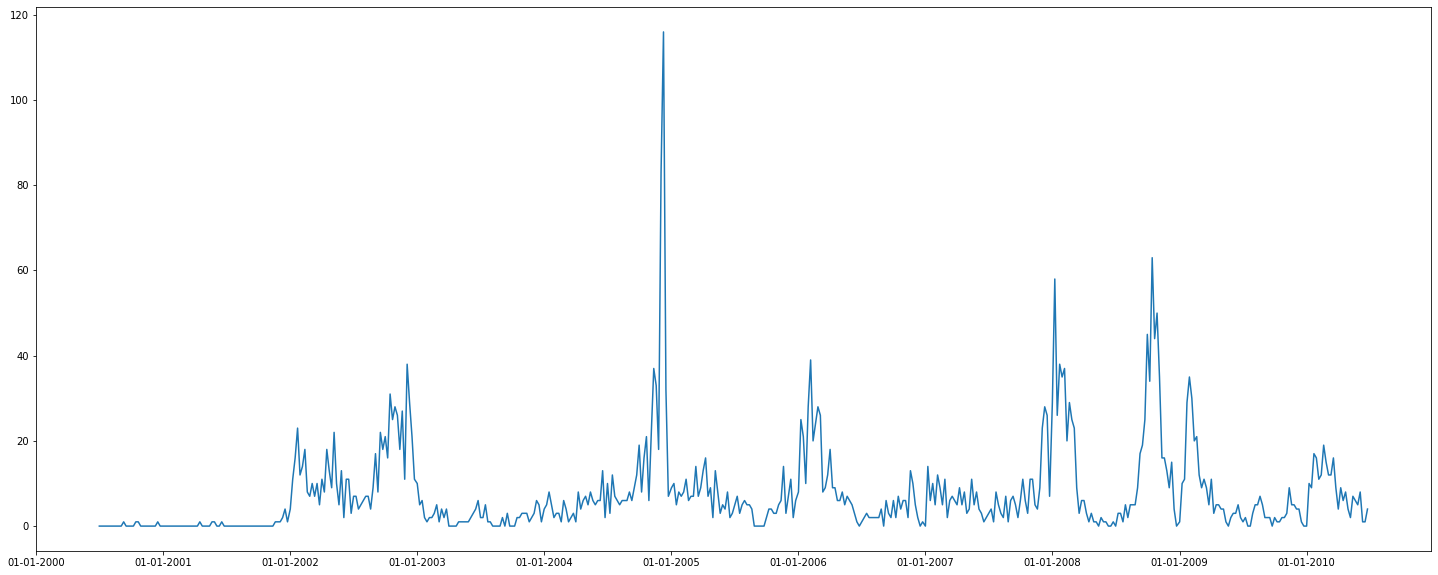

In [ ]:
plt.figure(figsize=(25,10))
plt.plot(iq['week_start_date'],iq["total_cases"])
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator(1, month=1, day=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))

In [ ]:
#Grouping year wise
iq.groupby(["year"]).agg({"total_cases":["sum","max","min","mean","std"]})

total_cases                               
             sum  max min       mean        std
year                                           
2000           4    1   0   0.153846   0.367946
2001          14    4   0   0.269231   0.689285
2002         704   38   2  13.538462   8.318327
2003         114   10   0   2.192308   2.096107
2004         638  116   1  12.269231  19.599035
2005         311   16   0   5.980769   3.867869
2006         436   39   0   8.384615   8.800967
2007         365   28   0   7.019231   5.682758
2008         801   63   0  15.403846  16.837469
2009         324   35   0   6.230769   7.750055
2010         223   19   0   8.576923   5.285248

Year 2000 and 2001 have extremely low cases than rest of the years.

---


Year 2004 have highest peak and year 2008 records high no of cases.

In [ ]:
year_2001=iq.loc[iq["year"]==2001]
year_2002=iq.loc[iq["year"]==2002]
year_2004=iq.loc[iq["year"]==2004]

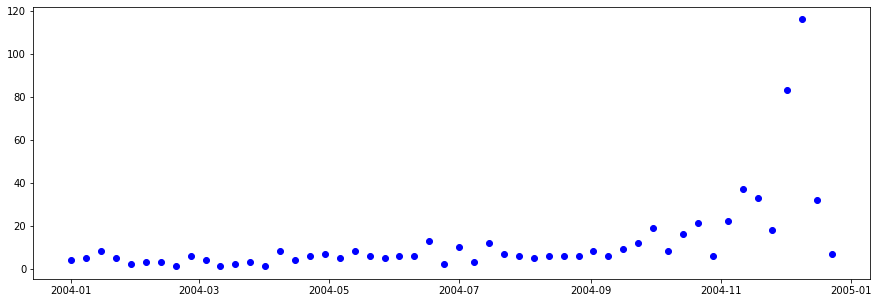

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(year_2004['week_start_date'],year_2004["total_cases"], 'bo')

In [ ]:
year_2001.groupby(["month"]).agg({"total_cases":["sum","max","min","mean","std"]})

total_cases                        
              sum max min  mean       std
month                                    
1               0   0   0  0.00  0.000000
2               0   0   0  0.00  0.000000
3               0   0   0  0.00  0.000000
4               1   1   0  0.20  0.447214
5               2   1   0  0.50  0.577350
6               1   1   0  0.25  0.500000
7               0   0   0  0.00  0.000000
8               0   0   0  0.00  0.000000
9               0   0   0  0.00  0.000000
10              0   0   0  0.00  0.000000
11              2   1   0  0.50  0.577350
12              8   4   1  2.00  1.414214

In [ ]:
year_2002.groupby(["month"]).agg({"total_cases":["sum","max","min","mean","std"]})

total_cases                          
              sum max min   mean        std
month                                      
1              66  23   4  13.20   6.978539
2              47  18   7  11.75   5.188127
3              32  10   5   8.00   2.449490
4              59  18   8  11.80   3.962323
5              50  22   5  12.50   7.141428
6              27  11   2   6.75   4.924429
7              29   7   4   5.80   1.303840
8              27   9   4   6.75   2.061553
9              65  22   8  16.25   5.909033
10            121  31  16  24.20   5.890671
11             82  27  11  20.50   7.505553
12             99  38  11  24.75  11.500000

In [ ]:
iq.groupby(["year"]).agg({"station_min_temp_c":["max","min","mean"]})

station_min_temp_c                 
                    max   min       mean
year                                    
2000               22.0  14.7  20.323077
2001               22.0  17.1  20.466346
2002               23.3  18.6  21.075000
2003               23.4  16.8  21.755769
2004               23.6  18.3  21.564423
2005               23.7  16.9  21.534615
2006               24.2  17.8  21.430769
2007               22.9  16.4  21.176923
2008               22.8  17.8  21.013462
2009               22.3  19.4  21.225962
2010               22.9  19.2  21.640385

In [ ]:
iq.groupby(["year"]).agg({"reanalysis_specific_humidity_g_per_kg":["max","min","mean","std"]})

reanalysis_specific_humidity_g_per_kg                                
                                       max        min       mean       std
year                                                                      
2000                             17.120000  12.652857  15.383352  1.174773
2001                             19.305714  12.464286  16.561181  1.485937
2002                             18.784286  13.441429  16.840027  1.559145
2003                             19.107143  12.947143  16.946621  1.367128
2004                             18.855714  13.824286  17.236236  1.220080
2005                             19.274286  13.590000  17.279945  1.531483
2006                             19.731429  12.111429  17.182720  1.602095
2007                             18.924286  13.804286  17.137665  1.265397
2008                             19.617143  14.780000  17.282720  1.085080
2009                             19.254286  15.482857  17.657486  0.908838
2010                             20.461429  14.908571  18.402967  1.277165

In [ ]:
iq.groupby(["year"]).agg({"precipitation_amt_mm":["sum","max","min","mean"]})

precipitation_amt_mm                         
                      sum     max   min       mean
year                                              
2000             1238.190  111.06  3.90  47.622692
2001             3243.970  149.71  0.00  62.384038
2002             3034.050  151.73  3.18  58.347115
2003             3406.820  166.52  2.64  65.515769
2004             3431.690  173.45  4.65  65.994038
2005             3187.290  162.51  0.00  61.294038
2006             3822.230  157.75  1.17  73.504423
2007             3534.060  157.86  1.59  67.962692
2008             3246.410  210.83  0.00  62.430962
2009             3674.240  149.06  6.52  70.658462
2010             1554.375  138.51  1.15  59.783654

In [ ]:
iq.groupby(["year"]).agg({"total_vegetation":["sum","max","min","mean"]})

total_vegetation                              
                  sum       max       min      mean
year                                               
2000         6.962741  0.375226  0.098866  0.267798
2001        13.685553  0.448015  0.096439  0.263184
2002        12.556377  0.375696  0.102557  0.241469
2003        13.091738  0.443868  0.124786  0.251764
2004        12.898790  0.377178  0.113225  0.248054
2005        13.716815  0.406468  0.135127  0.263785
2006        13.814025  0.418471  0.120876  0.265654
2007        13.180319  0.411000  0.087021  0.253468
2008        13.286992  0.479861  0.102046  0.255519
2009        13.156420  0.503982  0.084155  0.253008
2010         5.998287  0.317950  0.142368  0.230703

In [ ]:
#Grouping by months
iq.groupby(["month"]).agg({"total_cases":["sum","max","min","mean","std"]})

total_cases                               
              sum  max min       mean        std
month                                           
1             604   58   0  12.080000  12.225500
2             503   39   0  12.575000  10.497588
3             290   26   0   7.250000   5.754597
4             285   18   0   5.700000   4.713203
5             194   22   0   4.850000   4.532221
6             135   13   0   3.375000   3.200060
7             153   12   0   3.060000   2.923585
8             126    9   0   3.150000   2.732051
9             277   45   0   6.441860   9.300032
10            458   63   0   9.744681  14.380645
11            393   37   0   9.825000  10.307795
12            516  116   0  12.900000  22.834746

Cannot eliminate christmas effect with this table.

In [ ]:
#################################################################
#################################################################
#################################################################

**ANALYSIS**


Idea is to understand the cause behind the noise and smooth the total cases curve.

Lag features werent used.


---

SAN JUAN:

---

Observations:

1. Year 1994 and 1998 records an unusual number of total cases than rest of the years.

2. In 1994, cases are starting to rise from month June, peaks at October and declines.

3. From late 1997 to 1998 records an average number of high cases than other years.

4. In 1998 cases peak from month July to August and declines.

5. Total precipitation is low in the peak year 1994 than the rest.

5. Temperature, specific humidity and vegetation index does not explain the peak no of cases.




---

Conclusions:

1. None of the features explicitly explain the peak no of cases in year 1994 and 1998

2. In 1994, there was an oil spill in January and the cleaning was done until late April which may unsupportively explain the habitation of more mosquitoes in the back waters that caused high no of cases in later months. 

(Ref: https://en.wikipedia.org/wiki/Morris_J._Berman_oil_spill#:~:text=Berman%20oil%20spill%20occurred%20on,gallons%20of%20heavy%20grade%20oil)

3. If at all we're only using the data modelling approach with temp features, we can remove the noise to improve the model (a smoothening approach).


---



---

IQUITOS:



---

Observations and conclusions:

1. Year 2000 and 2001 records extremley lower no of cases than rest of the years.

2. No feature can explain the highest peak in 2004.

3. Peru declared epidemic due to Dengue from 1994-2006, hence cases in 2000 - 2001 doesn't justify the high shift from 2002.

(Ref: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2870787/)

4. It is more appropriate and meaningful to model from year 2002.



---



---

Final:

1. To smoothen the curve for SJ and to remove the first two years in IQ for for negaive binomial model.

2. Use all data for TSA model





In [ ]:
###########################################################
###########################################################